In [1]:
cd /data/store01/data_dirs/students/ucfafyi/S2_MODIS

/data/store01/data_dirs/students/ucfafyi/S2_MODIS


In [2]:
import sys
sys.path.insert(0, 'python')
from Aerosol_solving import *
from fastRWpkl import *
%matplotlib inline

In [11]:
[i[0][0] for i in parallel_rw_pkl(None, '31UCU_PSF', 'r')]

[array([ 30.05294918,  39.23884573, -15.        ,  38.37466874,  36.08948403]),
 array([ 28.42189703,  46.16687582, -14.35184779,  33.52740496,  36.66205841]),
 array([ 28.9732921 ,  38.67458231, -11.01738003,  33.85948106,  34.60925541]),
 array([ 29.26439027,  41.06747199, -15.        ,  36.4876675 ,  38.60321191]),
 array([ 32.25386058,  44.54136249, -10.23075598,  36.54272096,  34.07948522])]

In [3]:
aot_sol = Aerosol_retrival(S2_fname='31UCU',\
                           lat=52.607756, lon = 0.861739, S2_day=12, S2_month=8,\
                           S2_psf=[  28.42189703,  46.16687582, -14.35184779,  33.52740496,  36.66205841], year=2016)
aot, wv= aot_sol.S2_aot()
sr = aot_sol.S2_cor()

python/Aerosol_solving.py:223: RuntimeWarning: invalid value encountered in double_scalars
  return 1.*J/pix_num , J_prime
python/smoothn.py:193: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if W != None:
python/smoothn.py:211: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if W == None:


Saving surface reflectance....


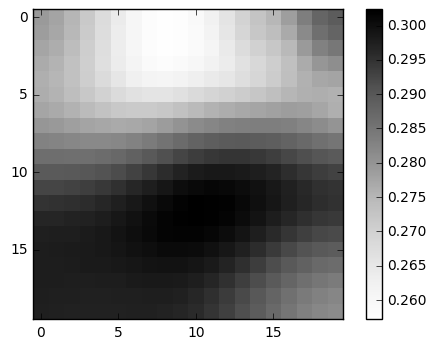

In [4]:
plt.imshow(aot, interpolation='None', cmap=plt.cm.get_cmap('Greys'))
plt.colorbar()

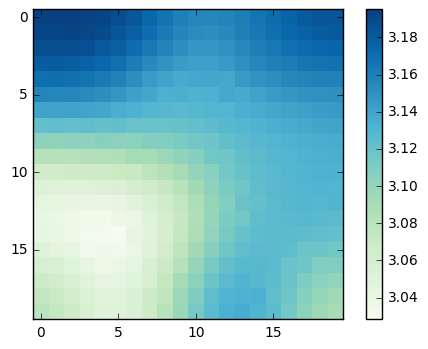

In [5]:
plt.imshow(wv, interpolation='None', cmap=plt.cm.get_cmap('GnBu'))
plt.colorbar()

In [6]:
aot_sol.ECWMF_aot, aot_sol.ECWMF_twv/10., aot_sol.ECWMF_tco*46

(0.15413013485026816, 2.9323572548568668, 0.29838569967528128)

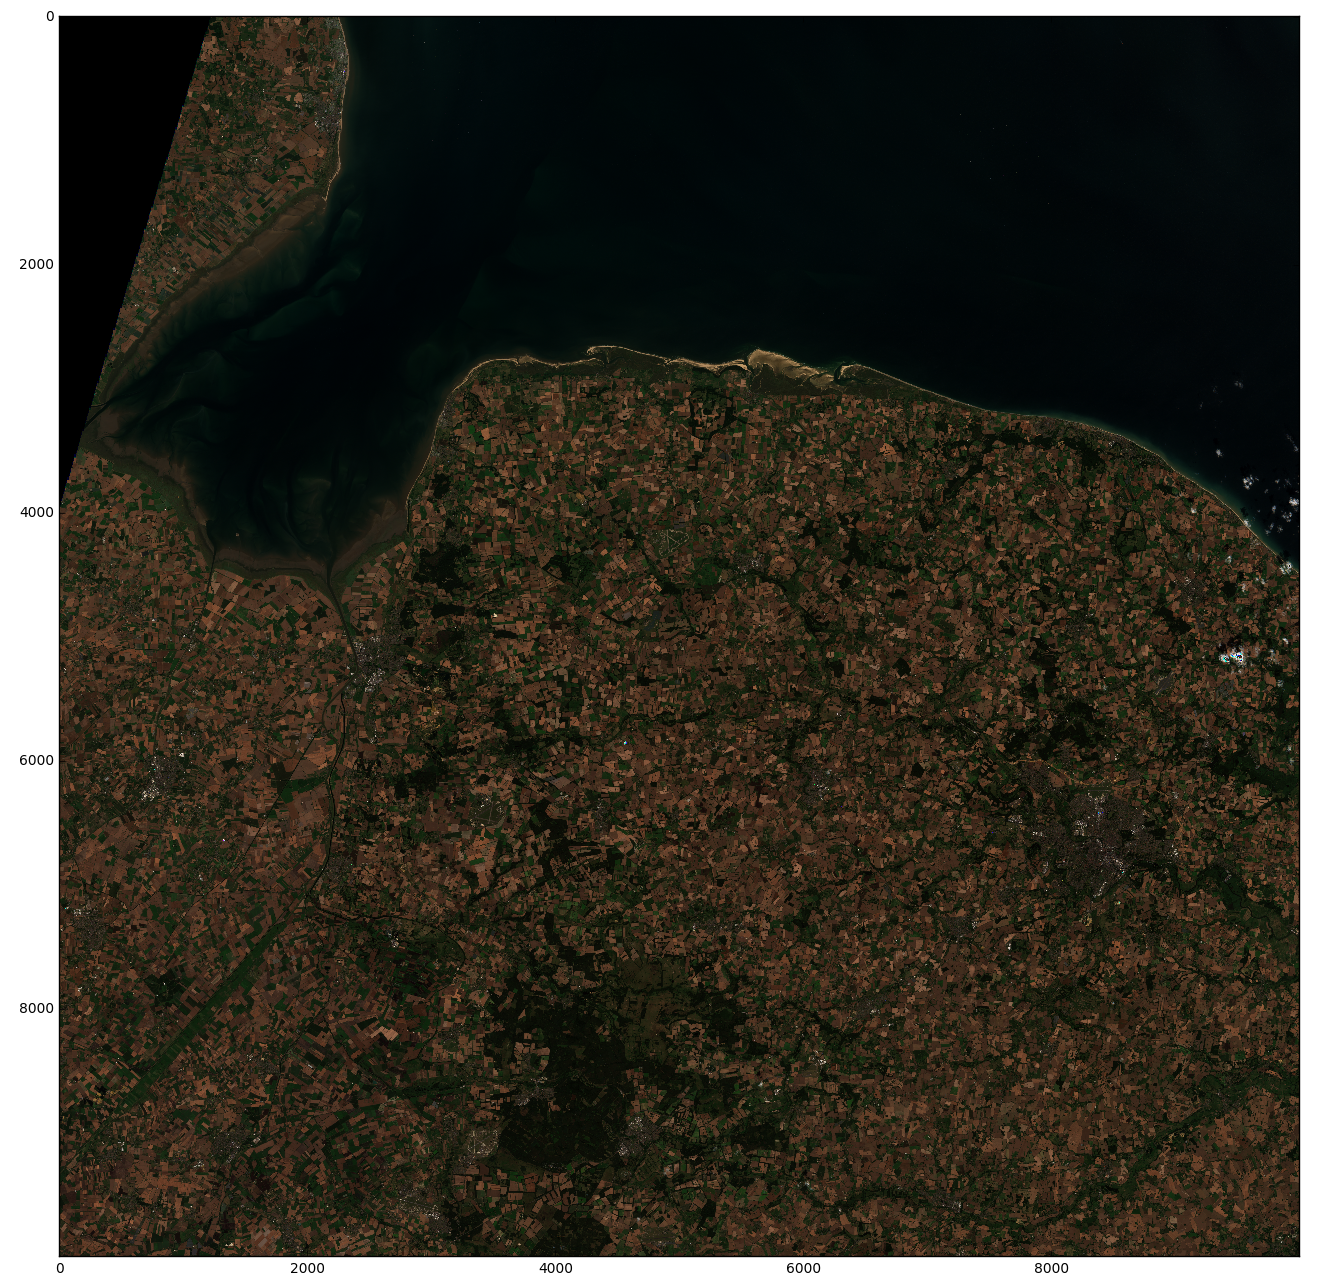

In [7]:
plt.figure(figsize=(16,16))
plt.imshow(np.array([sr[2], sr[1], sr[0]]).transpose(1,2,0)*2,interpolation='None')
plt.savefig('image/%s_%02d_%02d.pdf'%(aot_sol.S2_fname, aot_sol.S2_month, aot_sol.S2_day), dpi=400)

In [8]:
aoi = aoi= np.array([gdal.Open(aot_sol.Hfile+'%s.jp2'%band).ReadAsArray()*0.0001 for band in aot_sol.bands[:3]]).transpose(1,2,0)

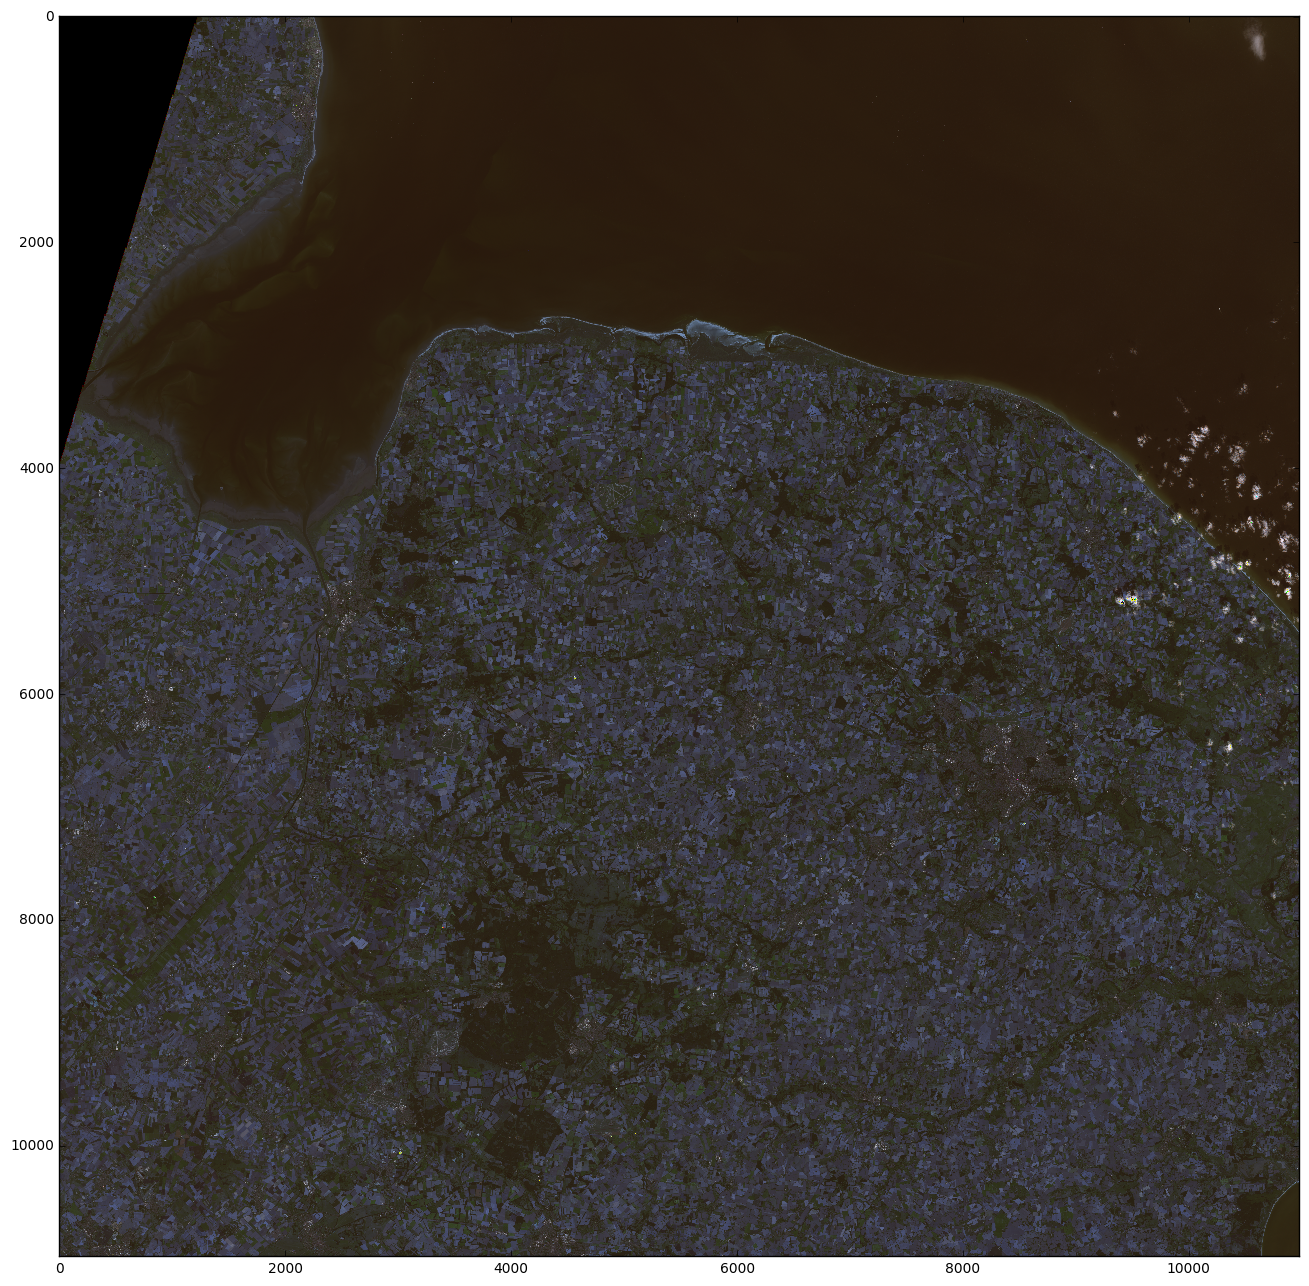

In [10]:
plt.figure(figsize=(16,16))
plt.imshow(aoi*2,interpolation='None')
plt.savefig('%s_%02d_%02d_toa.pdf'%(aot_sol.S2_fname, aot_sol.S2_month, aot_sol.S2_day), dpi=400)